### 2019 SG401 - Oculus Glider (Quick Look)

- Data is hosted on Pavlof (netcdf) and downdraft (erddap)

- Deployed from Dyson at:
    + Data Prior to April 20th is test data from Puget Sound

--
Tested with Python >= 3.6

In [98]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
import GliderDataLoader
import cmocean
import numpy as np

In [99]:
sg401=GliderDataLoader.erddap_glider('sg401')
sg401.list_data(verbose=True)

0     sg401_2019_aanderaa
1      sg401_2019_wetlabs
2      sg401_EcoFOCI_2019
3    sg401_b9ae_ed68_1861
Name: Dataset ID, dtype: object


In [100]:
variables = {'sg401_EcoFOCI_2019':['profileid',
                     'latitude', 
                     'ctd_depth', 
                     'longitude', 
                     'salinity',
                     'density', 
                     'time', 
                     'temperature'],
                     'sg401_2019_wetlabs':['time',
                     'wlbb2fl_sig695nm_adjusted',
                     'wlbb2fl_sig470nm_adjusted', 
                     'wlbb2fl_sig700nm_adjusted', 
                     'wlbb2fl_temp',
                     'profileid_wetlabs'],
                     'sg401_2019_aanderaa':['time',
                     'aanderaa4330_dissolved_oxygen',
                     'aa4330_airsat',
                     'aa4330_temp']}
sg401.constrain_data(variables=variables)
dfs = sg401.load_data()

sg401_2019_aanderaa
sg401_2019_wetlabs
sg401_EcoFOCI_2019


## Timeseries plots

In [101]:
data_window = dfs['sg401_EcoFOCI_2019']['2019-3-15':]

(<Figure size 1224x144 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13048d0b8>)

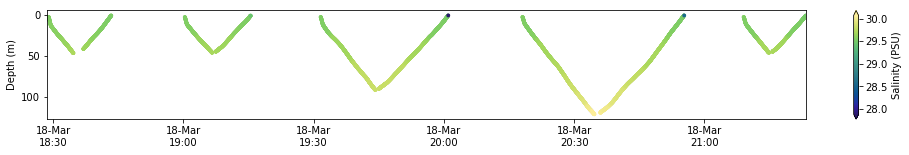

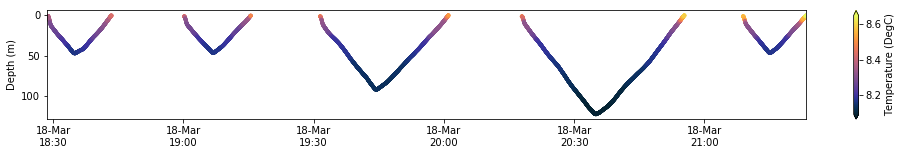

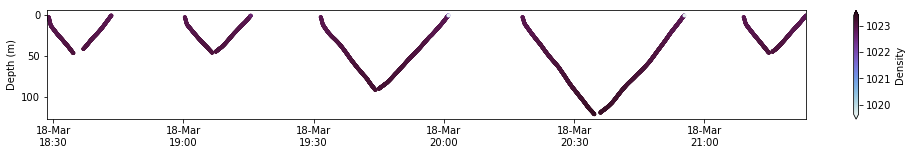

In [102]:
sg401.plot_timeseries(data_window.sort_index(), 'salinity (PSU)','Salinity (PSU)',cmocean.cm.haline)

sg401.plot_timeseries(data_window.sort_index(), 'temperature (degrees_Celsius)','Temperature (DegC)')

sg401.plot_timeseries(data_window.sort_index(), 'density (g/m^3)','Density',cmocean.cm.dense)

In [103]:
### depth needs to be downsampled to the other database freqencyies to plot chlor/oxy

dfwet = dfs['sg401_2019_wetlabs'].join(dfs['sg401_EcoFOCI_2019'])
dfaan = dfs['sg401_2019_aanderaa'].join(dfs['sg401_EcoFOCI_2019'])

#quick QC
dfaan.aa4330_airsat[dfaan.aa4330_airsat < 0] =np.nan


(<Figure size 1224x144 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12fec9518>)

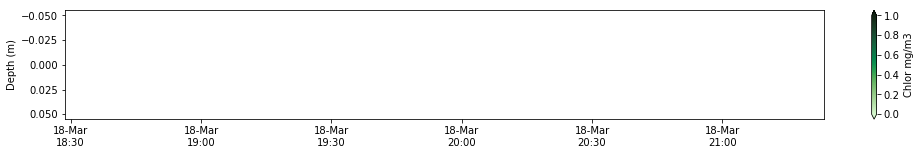

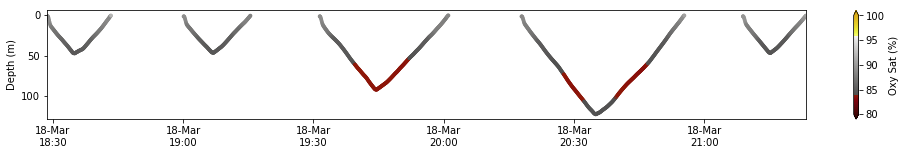

In [104]:
sg401.plot_timeseries(dfwet['2019-3-15':], 'wlbb2fl_sig695nm_adjusted','Chlor mg/m3',cmocean.cm.algae)

sg401.plot_timeseries(dfaan['2019-3-15':], 'aa4330_airsat','Oxy Sat (%)',cmocean.cm.oxy,vmin=80,vmax=100)

## waterfall plots

(<Figure size 576x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1303805c0>)

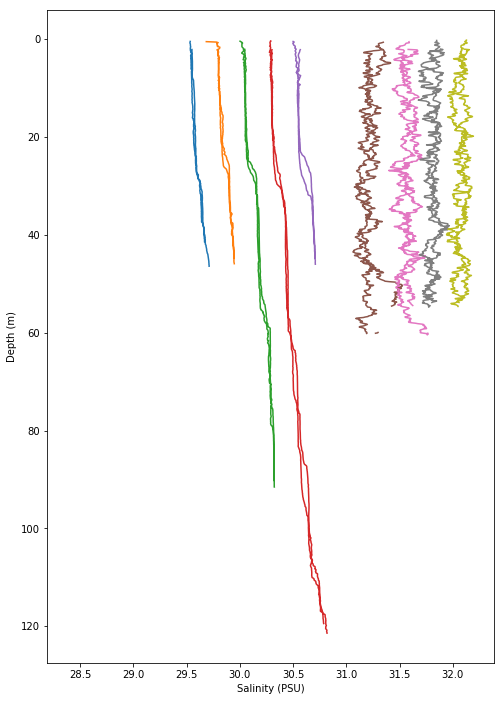

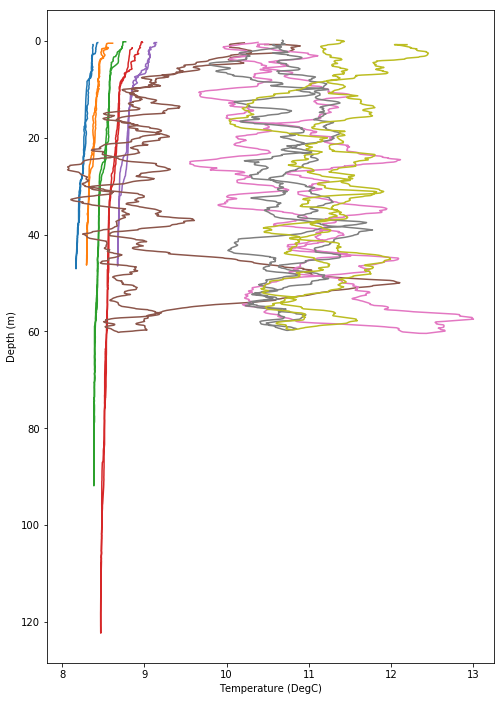

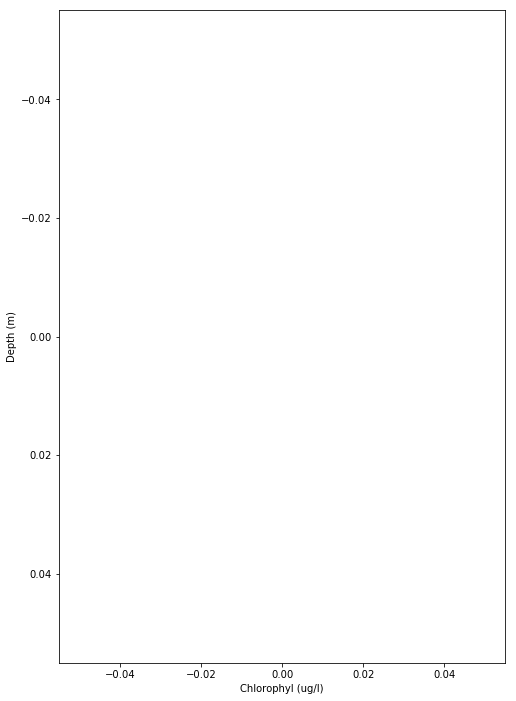

In [105]:
dfg = dfs['sg401_EcoFOCI_2019'].groupby('profileid')
dfwg = dfwet.groupby('profileid')

sg401.plot_waterfall(dfg, 'salinity (PSU)','Salinity (PSU)',.25)
sg401.plot_waterfall(dfg, 'temperature (degrees_Celsius)','Temperature (DegC)',.125)
sg401.plot_waterfall(dfwg, 'wlbb2fl_sig695nm_adjusted','Chlorophyl (ug/l)',.25)

## Holoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
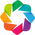

In [106]:
import holoviews as hv
from holoviews import opts
import datetime
hv.extension('bokeh')

In [107]:
#last weeks worth of data
example = hv.Table(dfs['sg401_EcoFOCI_2019'][(datetime.datetime.today()-datetime.timedelta(days=7)).strftime('%Y-%m-%d'):])

In [108]:
(hv.Scatter(example, 'salinity (PSU)', 'temperature (degrees_Celsius)'))+\
(hv.Scatter(example, 'salinity (PSU)', 'ctd_depth (meters)')+
 hv.Scatter(example, 'temperature (degrees_Celsius)', 'ctd_depth (meters)')).opts(
    opts.Scatter(alpha=0.2, size=4, color='black', invert_yaxis=True))

:Layout
   .Scatter.I   :Scatter   [salinity (PSU)]   (temperature (degrees_Celsius))
   .Scatter.II  :Scatter   [salinity (PSU)]   (ctd_depth (meters))
   .Scatter.III :Scatter   [temperature (degrees_Celsius)]   (ctd_depth (meters))